# ` Analysis of the Advertising Media affecting Sales`

~Submitted by `Nitesh sharma`   20114013  IIT Kanpur, India      
 https://www.linkedin.com/in/niteshnit/

## Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import statsmodels.api as sm

In [6]:
import statsmodels.formula.api as smf

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [10]:
from sklearn.decomposition import PCA

In [11]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [12]:
from sklearn.preprocessing import scale

In [13]:
from sklearn import model_selection

In [14]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [15]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

## Linear Methods for Regression

# `Simple Linear Regression`

We will understand the dataset first.

In [16]:
ads = pd.read_csv("../input/advertising-dataset/advertising.csv")

In [17]:
ads.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [18]:
ads = ads[['TV', 'Radio', 'Newspaper', 'Sales']]

In [19]:
ads.rename(columns={"Radio": "radio", "Newspaper": "newspaper","Sales": "sales"},inplace=True)

In [20]:
ads.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [21]:
ads.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales      200.0   15.1305   5.283892  1.6  11.000   16.00   19.050   27.0

In [22]:
ads.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [23]:
ads.shape

(200, 4)

In [24]:
ads.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Let's see correlations between variables.

In [25]:
ads.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.901208
radio      0.054809  1.000000   0.354104  0.349631
newspaper  0.056648  0.354104   1.000000  0.157960
sales      0.901208  0.349631   0.157960  1.000000

Let's see correlations in pairplot.

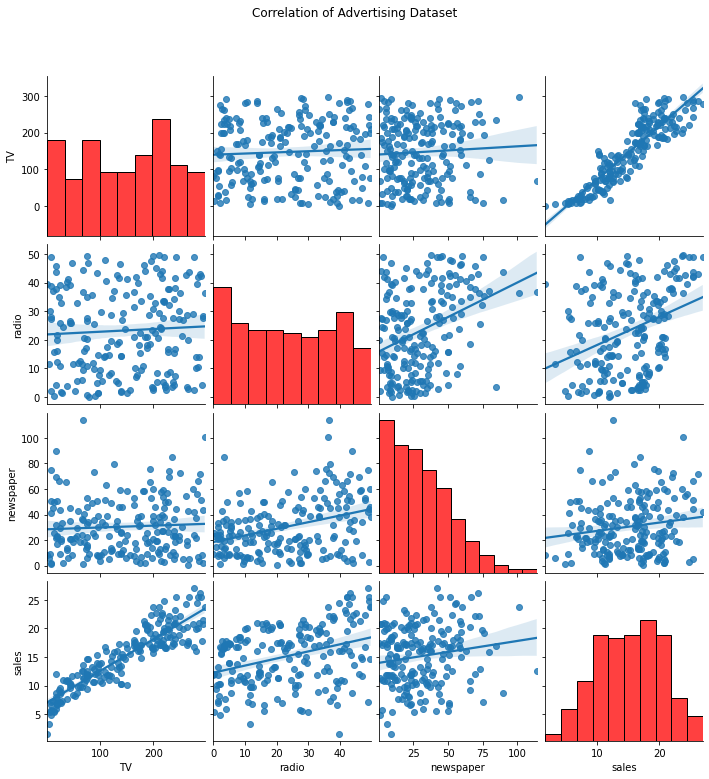

In [26]:
g= sns.pairplot(ads,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Correlation of Advertising Dataset", y=1.08)

plt.show()

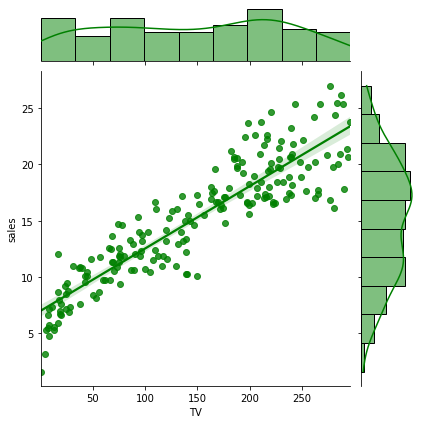

In [27]:
sns.jointplot(x="TV", y="sales",data=ads,kind="reg",color="green")

plt.show()

Now we will create a simple linear regression model by using **statsmodel** library.

In [28]:
X = ads.TV
X = sm.add_constant(X) # It will add a constant to X.
X.head()

const     TV
0    1.0  230.1
1    1.0   44.5
2    1.0   17.2
3    1.0  151.5
4    1.0  180.8

In [29]:
y = ads.sales # Dependent Variable -Target

In [30]:
slr = sm.OLS(y,X) 

In [31]:
model = slr.fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           7.93e-74
Time:                        13:16:20   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model.params # Main parameters

const    6.974821
TV       0.055465
dtype: float64

In [34]:
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [35]:
model.conf_int()

0         1
const  6.338740  7.610903
TV     0.051727  0.059203

In [36]:
#Signifigant Level - P value

model.f_pvalue

7.927911625320458e-74

In [37]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [38]:
model.fvalue

856.1767128172628

In [39]:
model.tvalues

const    21.623767
TV       29.260497
dtype: float64

In [40]:
#Sum of squares error of model

model.mse_model #This is very bad

4512.435170440975

In [41]:
model.rsquared

0.8121757029987414

In [42]:
model.rsquared_adj

0.811227095438129

In [43]:
#Predicted Values
model.fittedvalues[:5]

0    19.737265
1     9.443004
2     7.928816
3    15.377734
4    17.002852
dtype: float64

In [44]:
#real values
y[:5]

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: sales, dtype: float64

In [45]:
#Manual formula of our model
print("Sales: " , model.params[0] , "+ (TV*",model.params[1],")")

Sales:  6.974821488229895 + (TV* 0.05546477046955889 )


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


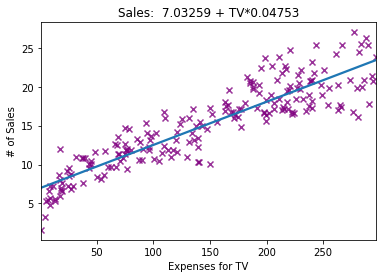

In [46]:
ax = sns.regplot(ads["TV"],ads["sales"],ci=None,scatter_kws={"color":"purple"},marker="x")
ax.set_title("Sales:  7.03259 + TV*0.04753")
ax.set_ylabel("# of Sales")
ax.set_xlabel("Expenses for TV")

plt.show()

Now we will create a model with **sklearn** library.

In [47]:
X = ads[["TV"]]
sm.add_constant(X)
y = ads["sales"]

In [48]:
lr = LinearRegression()
model = lr.fit(X,y)

In [49]:
model.coef_.item()

0.05546477046955886

In [50]:
model.intercept_

6.9748214882298925

In [51]:
model.score(X,y) #R Squared

0.8121757029987414

In [52]:
model.predict(X)[:10]

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199,
        7.45736499, 10.16404579, 13.6416869 ,  7.45181851, 18.05668263])

Let's predict a spesific value.

In [53]:
model.predict([[20]])

array([8.0841169])

In [54]:
model.predict([[43],[20],[32]])

array([9.35980662, 8.0841169 , 8.74969414])

#### Residuals

In [55]:
slr = sm.OLS(y,X) 
model = slr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              2714.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                   6.42e-118
Time:                        13:16:38   Log-Likelihood:                         -570.23
No. Observations:                 200   AIC:                                      1142.
Df Residuals:                     199   BIC:                                      1146.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0909      0.002     52.092      0.000       0.087       0.094
==============================================================================
Omnibus:                        9.476   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.081
Skew:                          -0.540   Prob(JB):                      0.00647
Kurtosis:                       2.792   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
mean_square = mean_squared_error(y,model.fittedvalues)
mean_square

17.539717827789044

In [57]:
rmse = np.sqrt(mean_square)
rmse

4.1880446305870525

In [58]:
results = pd.DataFrame({"Real": y, "Prediction": model.predict(X),
                        "Residuals": y -(model.predict(X)),
                        "Square of Residuals": (y -(model.predict(X)))**2})

In [59]:
results.head(10)

Real  Prediction  Residuals  Square of Residuals
0  22.1   20.912491   1.187509             1.410177
1  10.4    4.044354   6.355646            40.394236
2  12.0    1.563211  10.436789           108.926565
3  16.5   13.768981   2.731019             7.458467
4  17.9   16.431892   1.468108             2.155340
5   7.2    0.790694   6.409306            41.079204
6  11.8    5.225851   6.574149            43.219439
7  13.2   10.924300   2.275700             5.178810
8   4.8    0.781605   4.018395            16.147494
9  15.6   18.158695  -2.558695             6.546921

In [60]:
np.sum(results["Square of Residuals"]) # root mean_square error

3507.943565557809

In [61]:
np.mean(results["Square of Residuals"]) # mean_square error

17.539717827789044

In [62]:
model.resid[:10]

0     1.187509
1     6.355646
2    10.436789
3     2.731019
4     1.468108
5     6.409306
6     6.574149
7     2.275700
8     4.018395
9    -2.558695
dtype: float64

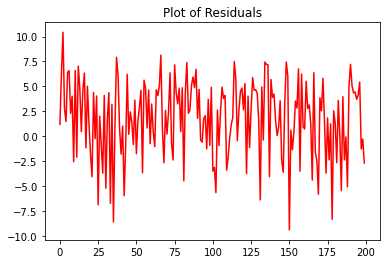

In [63]:
plt.plot(model.resid,c="r")
plt.title("Plot of Residuals")
plt.show()

## `Multiple Linear Regression`

#### Model

For a real world example, we will use *advertising* dataset.

It can be downloaded from here: https://www.kaggle.com/ashydv/advertising-dataset

We will understand the dataset first.

In [64]:
ads = pd.read_csv("../input/advertising-dataset/advertising.csv")
ads.rename(columns={"Radio": "radio", "Newspaper": "newspaper","Sales": "sales"},inplace=True)

In [65]:
ads = ads[['TV', 'radio', 'newspaper', 'sales']]
ads.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [66]:
ads.shape

(200, 4)

Let's select all independent variables.

In [67]:
X = ads.drop("sales",axis=1)
X.head()

TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

Now we will select dependent variable.

In [68]:
y = ads["sales"]
y[:5]

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: sales, dtype: float64

Now we will split our dataset as train and test set.

In [69]:
ads.shape

(200, 4)

In [70]:
X_train = X.iloc[:160]
X_test = X.iloc[160:]
y_train = y[:160]
y_test = y[160:]

In [71]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (160, 3)
X_test Shape:  (40, 3)
y_train Shape:  (160,)
y_test Shape:  (40,)


First we will create our model with **statsmodel**.

Rsquare is explanation rate. Results means we explain 0.98 of sales variable.

In [72]:
mlr = sm.OLS(y_train,X_train)
model = mlr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2312.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                   1.20e-129
Time:                        13:16:58   Log-Likelihood:                         -364.40
No. Observations:                 160   AIC:                                      734.8
Df Residuals:                     157   BIC:                                      744.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0664      0.002     37.357      0.000       0.063       0.070
radio          0.1575      0.013     12.532      0.000       0.133       0.182
newspaper      0.0308      0.009      3.538      0.001       0.014       0.048
==============================================================================
Omnibus:                        0.540   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.237
Skew:                           0.028   Prob(JB):                        0.888
Kurtosis:                       3.180   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we will create our model with **sklearn**.

In [73]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [74]:
print("Intercept of Model-Bias: ",model.intercept_)
print("Coefficients of Model: ",model.coef_)

Intercept of Model-Bias:  4.481949566663138
Coefficients of Model:  [0.05472077 0.10477602 0.00306638]


In [75]:
print("Sales:", model.intercept_ ," + ",
      model.coef_[0],"* TV +",
      model.coef_[1],"* Radio +",
      model.coef_[2],"* Newspaper")

Sales: 4.481949566663138  +  0.05472076883622846 * TV + 0.10477601943001441 * Radio + 0.003066380521005607 * Newspaper


#### Prediction

Let's predict a spesific value.

In [76]:
model.predict(pd.DataFrame([[35],[20],[45]]).T).item()

8.630683987976674

In [77]:
train_root_mean_square = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [78]:
print("root_mean_square_error of Training Set: ",train_root_mean_square)

root_mean_square_error of Training Set:  1.653601270245769


In [79]:
test_root_mean_square = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

In [80]:
print("root_mean_square_error of Test Set: ",test_root_mean_square)

root_mean_square_error of Test Set:  1.623865978485176


#### Model Tuning

In [81]:
X = ads.drop("sales",axis=1)
y = ads["sales"]

X_train = X.iloc[:160]
X_test = X.iloc[160:]
y_train = y[:160]
y_test = y[160:]

In [82]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [83]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.653601270245769

In [84]:
model.score(X_train,y_train)

0.9017116312831376

Let's calculate validated r2 score.

In [85]:
cross_val_score(model,X,y,cv=10,scoring="r2").mean()

0.8915173447734139

In [86]:
#Train Rsquare
cross_val_score(model,X_train,y_train,cv=20,scoring="r2").mean()

0.8680966060016175

In [87]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error"))

array([1.58815677, 1.98778973, 1.03482004, 1.54783465, 2.32476525,
       1.29433528, 1.64550241, 1.48248509, 1.33402101, 1.45588738,
       1.29638468, 0.87547747, 1.88664911, 1.33940484, 1.31873165,
       1.53275567, 3.02333853, 0.93853731, 2.29944323, 2.25376714])

In [88]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error")).mean()

1.6230043628738844

In [89]:
#Test Rsquare
cross_val_score(model,X_test,y_test,cv=20,scoring="r2").mean()

-4.81106721370662

In [90]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=20,scoring="neg_mean_squared_error"))

array([0.32467056, 2.07349748, 0.94322626, 2.16451298, 1.78803163,
       1.18711366, 1.58491055, 1.51860287, 1.79075203, 2.95538953,
       1.4539967 , 1.07112697, 2.59733351, 1.91688485, 0.86718485,
       1.50714009, 0.73422301, 0.11960665, 2.58382878, 0.68285813])

In [91]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=20,scoring="neg_mean_squared_error")).mean()

1.493244553969863

### Least-Squares Regression(Ordinary Least Squares)

The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

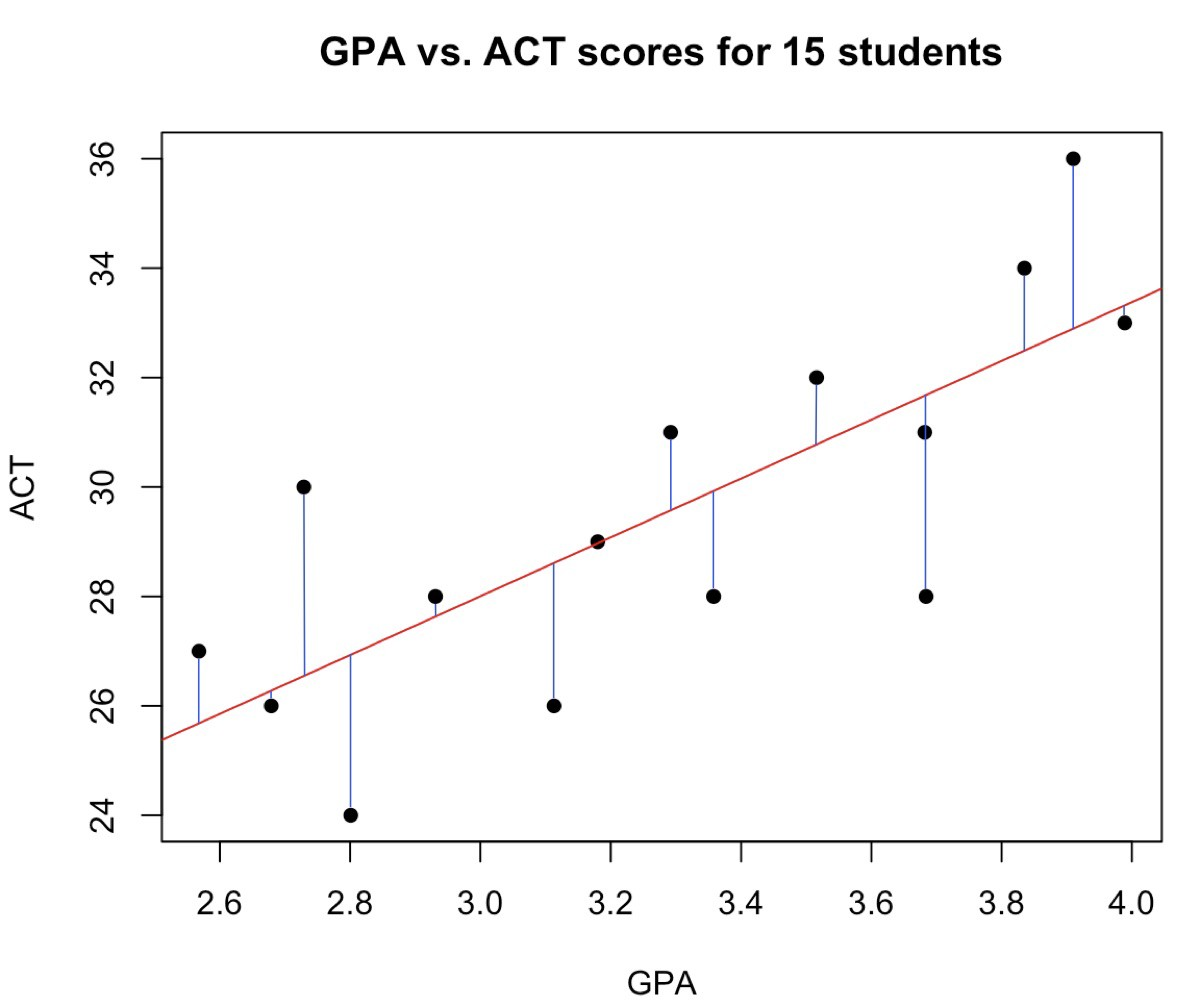

This photo is taken by: https://miro.medium.com/max/2366/1*tQkyTR9yxDcS1GKVFhdQQA.jpeg

### Principal Component Analysis (PCA) 

In [92]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

Now we will remove NA values.

In [93]:
hts.dropna(inplace=True)

In [94]:
hts.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

We will do **One Hot Encoding** to categorical columns.

In [95]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [96]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [97]:
new_hts.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  
1  321.0  414.0   375.0    632.0     43.0    10.0  
2  224.0  266.0   263.0    880.0     82.0    14.0  
3  828.0  838.0   354.0    200.0     11.0     3.0  
4   48.0   46.0    33.0    805.0     40.0     4.0  
5  501.0  336.0   194.0    282.0    421.0    25.0

In [98]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [99]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [100]:
X.shape

(263, 19)

In [101]:
y.shape

(263,)

In [102]:
X_train = X.iloc[:200]
X_test = X.iloc[200:]
y_train = y[:200]
y_test = y[200:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (200, 19)
X_test Shape:  (63, 19)
y_train Shape:  (200,)
y_test Shape:  (63,)


Let's do dimensionality reduction.

In [103]:
pca = PCA()

In [104]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [105]:
X_reduced_train[:5]

array([[-0.20734617,  1.90225323,  1.18586022, -1.05691602, -0.73617579,
         1.39233919, -0.49250059, -0.03502036, -0.38427368, -0.5451096 ,
         0.28689857, -0.80502297, -0.3405726 ,  0.27142567, -0.11867173,
         0.12372502,  0.05853784, -0.03382087, -0.01148623],
       [ 0.42919978, -2.53723573, -0.31064271, -0.10692387, -1.13001336,
         2.29286939, -0.18778909,  1.08504905, -0.49014462,  0.08165734,
         0.13830876, -0.04016291,  0.38495629, -0.02677618, -0.02755964,
         0.14160341,  0.00624337, -0.03205239, -0.00695663],
       [ 3.28644219,  0.90175579,  0.19359382, -1.53919197,  0.92146129,
        -1.26707784, -0.69842099, -0.87711054,  0.1956631 ,  0.81098551,
        -0.01807494, -0.04005277, -0.0520347 , -0.43859559, -0.2246159 ,
        -0.04678025, -0.17619738, -0.03800044, -0.06429503],
       [-2.57117645, -0.36054003,  0.25655259, -2.11139788,  1.22913201,
         1.58852743, -0.62162344, -0.31816179,  0.32886983,  0.11813513,
        -0.065

Let's see cumulative explanatioon rates.

In [106]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)[:6]

array([36. , 60.6, 72.6, 80.4, 85.3, 89.3])

### Principal Component Regression(PCR)

In [107]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

Now we will remove NA values.

In [108]:
hts.dropna(inplace=True)

In [109]:
hts.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

We will do **One Hot Encoding** to categorical columns.

In [110]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [111]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [112]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [113]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [114]:
hts.shape

(263, 20)

In [115]:
#Independent Variables
X.shape

(263, 19)

In [116]:
#Dependent Variables
y.shape

(263,)

In [117]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


Let's do dimensionality reduction.

In [118]:
pca = PCA()

In [119]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

Let's see cumulative explanatioon rates.

In [120]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)[:6]

array([34.5, 60. , 72.6, 81.5, 86.5, 90.4])

Let's create a model.

In [121]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train,y_train)

In [122]:
print("Intercept: ",pcr_model.intercept_)
print("Coefficients: ",pcr_model.coef_)

Intercept:  546.6944714285714
Coefficients:  [ 108.62906365  -24.35077093   23.95595793  -34.77184272  -83.14014623
   71.39286412    8.80356221   -9.69607076   54.01473132  136.14645851
    1.49578456   13.67658164   38.45645007 -264.2061819   170.91181041
  453.57803418 -410.34451125  673.85990715 -419.38631999]


#### Prediction

In [123]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:10]

array([ 403.21993393,  758.41542239, 1182.40881941,  650.66137637,
        578.96379589,  190.88965559,  106.06128243,  193.0449271 ,
        657.00809147,  968.70200341])

In [124]:
#root mean square error for Train Set
np.sqrt(mean_squared_error(y_train,y_pred))

303.22898816258595

In [125]:
#r2 score for Train Set
r2_score(y_train,y_pred)

0.5752262816943401

In [126]:
y_pred = pcr_model.predict(X_reduced_test)
y_pred[:10]

array([ 504.53657011,  569.42395377,  194.53967032,  240.45906447,
        503.91439963, 1141.51766146,   33.93846198,  378.63296484,
       1320.04133275,  806.28367883])

In [127]:
#root mean square error for Test Set
np.sqrt(mean_squared_error(y_test,y_pred))

335.63232477488793

In [128]:
#r2 score for Test Set
r2_score(y_test,y_pred)

0.22873295246020386

#### Model Tuning

In [129]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train,y_train)
y_pred = pcr_model.predict(X_reduced_test)
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error:  335.63232477488793


Let's try different dimensions.

In [130]:
pcr_model = pcr.fit(X_reduced_train[:,:3],y_train)
y_pred = pcr_model.predict(X_reduced_test[:,:3])
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error:  302.6167604337664


In [131]:
cross_val = model_selection.KFold(n_splits=7,
                                  shuffle=True,
                                  random_state=45)
pcr = LinearRegression()
Root_mean_sqaure_error = []

In [132]:
X_reduced_train.shape

(210, 19)

In [133]:
for num in np.arange(X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(pcr,X_reduced_train[:,:num],y_train.ravel(),
                                                       cv=cross_val,scoring="neg_mean_squared_error")).mean()
    
    Root_mean_sqaure_error.append(score)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 506, in fit
    y_numeric=True, multi_output=True)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py", line 802, in check_X_y
    estimator=estimator)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/utils/validatio

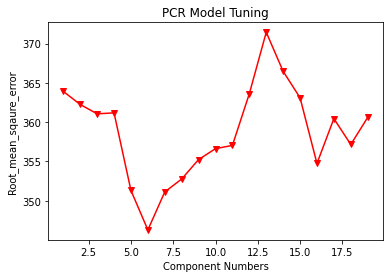

In [134]:
plt.plot(Root_mean_sqaure_error,"-v",c="r")
plt.xlabel("Component Numbers")
plt.ylabel("Root_mean_sqaure_error")
plt.title("PCR Model Tuning")

plt.show()

Optimum value seems 6. Now we will create a model with 6 components.

In [135]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train[:,:6],y_train)

In [136]:
y_pred = pcr_model.predict(X_reduced_train[:,:6])
print("Root mean square error for Train set: ",np.sqrt(mean_squared_error(y_train,y_pred)))

Root mean square error for Train set:  333.49362737261157


In [137]:
y_pred = pcr_model.predict(X_reduced_test[:,:6])
print("Root mean square error for Text set: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error for Text set:  289.76613807162045


### Shrinkage(Regularization) Methods

#### `Partial Least Squares (PLS)`

In [138]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

Now we will remove NA values.

In [139]:
hts.dropna(inplace=True)

In [140]:
hts.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

We will do **One Hot Encoding** to categorical columns.

In [141]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [142]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [143]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [144]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [145]:
hts.shape

(263, 20)

In [146]:
#Independent Variables
X.shape

(263, 19)

In [147]:
#Dependent Variables
y.shape

(263,)

In [148]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [149]:
pls_model = PLSRegression(n_components=7).fit(X_train,y_train)

In [150]:
pls_model.coef_

array([[-182.50759387],
       [ 169.37021424],
       [ -47.77506515],
       [  63.08891812],
       [  30.88901468],
       [  70.86551369],
       [ -97.2013175 ],
       [ -36.56263571],
       [  93.75294012],
       [ 126.62002648],
       [ 122.21898969],
       [ 155.47076042],
       [-150.91672409],
       [  84.28777431],
       [  72.6812175 ],
       [ -25.72515764],
       [  17.93140121],
       [ -92.7266382 ],
       [  23.7217116 ]])

##### Prediction

In [151]:
pls_model

PLSRegression(n_components=7)

In [152]:
X_train.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [153]:
pls_model.predict(X_train)[:10]

array([[ 342.37839948],
       [ 674.40578249],
       [1215.11323091],
       [ 633.48668554],
       [ 551.9388145 ],
       [ 256.98620543],
       [ 109.55958772],
       [ 174.82878563],
       [ 761.60266771],
       [ 965.67745006]])

In [154]:
y_pred=pls_model.predict(X_train)

In [155]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

313.32632336572675

In [156]:
r2_score(y_train,y_pred)

0.5464658750671466

In [157]:
y_pred=pls_model.predict(X_test)

In [158]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

333.7301969189611

In [159]:
r2_score(y_test,y_pred)

0.2374501785917753

##### Model Tuning

In [160]:
pls_model

PLSRegression(n_components=7)

In [161]:
cross_val = model_selection.KFold(n_splits=15,
                                  shuffle=True,
                                  random_state=45)
Root_mean_sqaure_error = []

In [162]:
for num in np.arange(1,X_train.shape[1]+1):
    pls= PLSRegression(n_components=num)
    score = np.sqrt(-1*model_selection.cross_val_score(pls,X_train,y_train,
                                                       cv=cross_val,scoring="neg_mean_squared_error")).mean()
    
    Root_mean_sqaure_error.append(score)

In [163]:
len(Root_mean_sqaure_error)

19

In [164]:
X_train.shape[1]

19

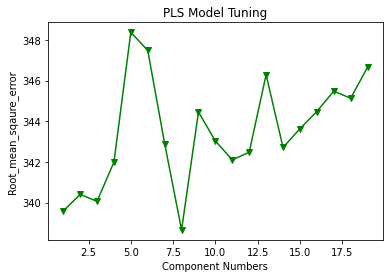

In [165]:
plt.plot(np.arange(1,X_train.shape[1]+1),np.array(Root_mean_sqaure_error),"-v",c="g")
plt.xlabel("Component Numbers")
plt.ylabel("Root_mean_sqaure_error")
plt.title("PLS Model Tuning")

plt.show()

Now we will create our last model with optimal value that seems 8.

In [166]:
pls_model = PLSRegression(n_components=8).fit(X_train,y_train)

In [167]:
y_pred=pls_model.predict(X_train)

In [168]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

309.05347867636664

In [169]:
r2_score(y_train,y_pred)

0.5587512609460972

In [170]:
y_pred=pls_model.predict(X_test)

In [171]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

330.64831768988034

In [172]:
r2_score(y_test,y_pred)

0.25146890013754264

### ~`Ridge Regression ( L2 Regularization)`

In [173]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

Now we will remove NA values.

In [174]:
hts.dropna(inplace=True)

In [175]:
hts.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

We will do **One Hot Encoding** to categorical columns.

In [176]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [177]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [178]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [179]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [180]:
hts.shape

(263, 20)

In [181]:
#Independent Variables
X.shape

(263, 19)

In [182]:
#Dependent Variables
y.shape

(263,)

In [183]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [184]:
ridge_model = Ridge(alpha=0.2).fit(X_train,y_train)

In [185]:
ridge_model

Ridge(alpha=0.2)

In [186]:
ridge_model.coef_

array([  -2.41189039,    8.91147063,    2.84201352,   -1.49426997,
         -1.05226295,    5.6084127 ,    0.60105755,   -0.16107707,
         -0.28338429,   -0.8960649 ,    1.88742486,    1.26712845,
         -0.87338654,    0.41711639,    0.63419076,   -2.87772869,
         18.86699972, -128.26622009,   50.77669259])

In [187]:
lambda_values= 10**np.linspace(5,-2,150)*0.5
ridge_model = Ridge()
coefficients = []

for lam in lambda_values:
    ridge_model.set_params(alpha=lam)
    ridge_model.fit(X_train,y_train)
    coefficients.append(ridge_model.coef_)

In [188]:
lambda_values[:10]

array([50000.        , 44873.52004792, 40272.65602982, 36143.51675475,
       32437.73647393, 29111.90835944, 26127.07606801, 23448.27743463,
       21044.13495104, 18886.48823234])

In [189]:
coefficients[:3]

[array([-0.51724961,  2.20034745, -0.07801802,  0.99088638,  0.26928077,
         1.57081143,  0.04971685, -0.33176435,  0.64136127, -0.06561597,
         1.07674083,  0.88778441, -0.30484539,  0.42449213,  0.46254923,
        -0.38833383,  0.05430532, -0.13718731,  0.05497141]),
 array([-0.58776623,  2.3690747 , -0.09175069,  1.03451326,  0.27434366,
         1.68190105,  0.05564627, -0.32840644,  0.62274636, -0.08593127,
         1.09578385,  0.89759135, -0.32073582,  0.42520274,  0.46880314,
        -0.42381594,  0.06056795, -0.15220841,  0.06142064]),
 array([-0.66066079,  2.54674474, -0.10672988,  1.07557019,  0.27883687,
         1.79682549,  0.0620108 , -0.32465588,  0.60280013, -0.10630167,
         1.11510592,  0.90723351, -0.33701251,  0.42591673,  0.47500509,
        -0.4615529 ,  0.06753149, -0.16885879,  0.06860893])]

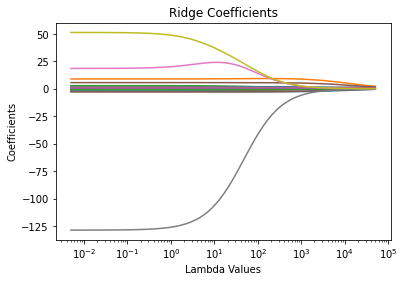

In [190]:
ax = plt.gca()
ax.plot(lambda_values,coefficients)
ax.set_xscale("log")

plt.xlabel("Lambda Values")
plt.ylabel("Coefficients")
plt.title("Ridge Coefficients")
plt.show()

##### Prediction

In [191]:
ridge_model

Ridge(alpha=0.005)

In [192]:
ridge_model.predict(X_train)[:10]

array([ 403.22327979,  758.42456908, 1182.39938932,  650.65312842,
        578.97168623,  190.89240803,  106.06933525,  193.04720572,
        657.00170616,  968.69758572])

In [193]:
y_pred=ridge_model.predict(X_train)

In [194]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

303.2289882531757

In [195]:
r2_score(y_train,y_pred)

0.5752262814405376

In [196]:
y_pred=ridge_model.predict(X_test)

In [197]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

336.98581286833246

In [198]:
r2_score(y_test,y_pred)

0.2224999079508907

##### Model Tuning

In [199]:
lambda_values= 10**np.linspace(5,-2,150)*0.5

In [200]:
lambda_values[:10]

array([50000.        , 44873.52004792, 40272.65602982, 36143.51675475,
       32437.73647393, 29111.90835944, 26127.07606801, 23448.27743463,
       21044.13495104, 18886.48823234])

In [201]:
Ridge_cv = RidgeCV(alphas=lambda_values,
                   scoring="neg_mean_squared_error",
                   normalize=True)

In [202]:
Ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+04, 4.48735200e+04, 4.02726560e+04, 3.61435168e+04,
       3.24377365e+04, 2.91119084e+04, 2.61270761e+04, 2.34482774e+04,
       2.10441350e+04, 1.88864882e+04, 1.69500642e+04, 1.52121809e+04,
       1.36524821e+04, 1.22526986e+04, 1.09964343e+04, 9.86897429e+03,
       8.85711232e+03, 7.94899614e+03, 7.13398876e+03, 6.40254375e+03,
       5.74609351e+03, 5.15694884e+0...
       4.84782781e-02, 4.35078197e-02, 3.90469804e-02, 3.50435091e-02,
       3.14505122e-02, 2.82259038e-02, 2.53319132e-02, 2.27346423e-02,
       2.04036685e-02, 1.83116886e-02, 1.64341985e-02, 1.47492067e-02,
       1.32369765e-02, 1.18797946e-02, 1.06617640e-02, 9.56861760e-03,
       8.58755108e-03, 7.70707291e-03, 6.91686981e-03, 6.20768593e-03,
       5.57121438e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [203]:
Ridge_cv.alpha_

0.009568617603791272

Now we will create our last model with optimal alpha value that seems 0.009568617603791272.

In [204]:
ridge_tuned = Ridge(alpha=Ridge_cv.alpha_,normalize=True).fit(X_train,y_train)

In [205]:
y_pred=ridge_tuned.predict(X_train)

In [206]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

306.6077508440482

In [207]:
r2_score(y_train,y_pred)

0.5657073660567311

In [208]:
y_pred=ridge_tuned.predict(X_test)

In [209]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

327.87513556679505

In [210]:
r2_score(y_test,y_pred)

0.2639722635189038

### ~`Lasso Regression( L1 Regularization)`

##### Model

In [211]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

Now we will remove NA values.

In [212]:
hts.dropna(inplace=True)

In [213]:
hts.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

We will do **One Hot Encoding** to categorical columns.

In [214]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [215]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [216]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [217]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [218]:
hts.shape

(263, 20)

In [219]:
#Independent Variables
X.shape

(263, 19)

In [220]:
#Dependent Variables
y.shape

(263,)

In [221]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [222]:
lasso_model = Lasso(alpha=0.1).fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9654454.53672286, tolerance: 4545.724279285033
  positive)


In [223]:
lasso_model

Lasso(alpha=0.1)

In [224]:
lasso_model.coef_

array([  -2.36728845,    8.69562348,    2.6253349 ,   -1.2995984 ,
         -1.01285484,    5.51874641,    1.35831429,   -0.18352931,
         -0.16612724,   -0.72026897,    1.80604429,    1.20306017,
         -0.84327277,    0.41573214,    0.64198626,   -2.94444835,
         19.81585838, -128.16251762,   49.86209437])

In [225]:
lambda_values= 10**np.linspace(5,-2,150)*0.5
lasso_model = Lasso()
coefficients = []

for lam in lambda_values:
    lasso_model.set_params(alpha=lam)
    lasso_model.fit(X_train,y_train)
    coefficients.append(lasso_model.coef_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4741.49054421857, tolerance: 4545.724279285033
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5852.535247571766, tolerance: 4545.724279285033
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5668.061602771282, tolerance: 4545.724279285033
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5422.72333258

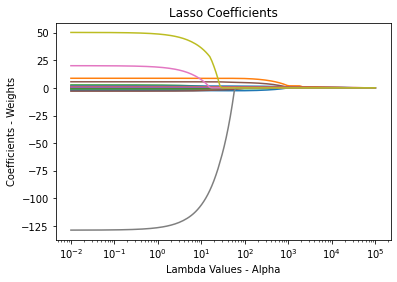

In [226]:
ax = plt.gca()
ax.plot(lambda_values*2,coefficients)
ax.set_xscale("log")

plt.axis("tight")
plt.xlabel("Lambda Values - Alpha")
plt.ylabel("Coefficients - Weights")
plt.title("Lasso Coefficients")
plt.show()

##### Prediction

In [227]:
lasso_model

Lasso(alpha=0.005)

In [228]:
lasso_model.predict(X_train)[:10]

array([ 400.7827288 ,  756.98597514, 1176.65551163,  649.19511665,
        570.48964377,  193.87333341,  107.02884517,  194.67623188,
        655.19484968,  971.39228125])

In [229]:
y_pred=lasso_model.predict(X_train)

In [230]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

303.25138888782294

In [231]:
r2_score(y_train,y_pred)

0.5751635199453826

In [232]:
y_pred=lasso_model.predict(X_test)

In [233]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

336.6329836759591

In [234]:
r2_score(y_test,y_pred)

0.22412716410250288

##### Model Tuning

In [235]:
Lasso_cv = LassoCV(alphas=None,
                   cv=15,
                   max_iter=15000,
                   normalize=True)

In [236]:
Lasso_cv.fit(X_train,y_train)

LassoCV(cv=15, max_iter=15000, normalize=True)

In [237]:
Lasso_cv.alpha_

0.07340278835886876

Now we will create our last model with optimal alpha value that seems 0.07340278835886885.

In [238]:
lasso_tuned = Lasso(alpha=Lasso_cv.alpha_).fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9654858.014191262, tolerance: 4545.724279285033
  positive)


In [239]:
y_pred=lasso_tuned.predict(X_train)

In [240]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

303.2514234667017

In [241]:
r2_score(y_train,y_pred)

0.575163423059627

In [242]:
y_pred=lasso_tuned.predict(X_test)

In [243]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

336.56987621526724

In [244]:
r2_score(y_test,y_pred)

0.2244180374118233

### ~`Elastic Net Regression`

In [245]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

Now we will remove NA values.

In [246]:
hts.dropna(inplace=True)

In [247]:
hts.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

We will do **One Hot Encoding** to categorical columns.

In [248]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [249]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [250]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [251]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [252]:
hts.shape

(263, 20)

In [253]:
#Independent Variables
X.shape

(263, 19)

In [254]:
#Dependent Variables
y.shape

(263,)

In [255]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [256]:
elastic_net_model = ElasticNet().fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9964166.327909496, tolerance: 4545.724279285033
  positive)


In [257]:
elastic_net_model

ElasticNet()

In [258]:
elastic_net_model.coef_

array([ -2.57038767,   9.08966777,   1.49845497,  -1.13947762,
        -0.34885378,   5.42445699,   1.6561179 ,  -0.18568568,
        -0.15639425,  -0.61738565,   1.84946479,   1.10766503,
        -0.8168196 ,   0.43065118,   0.63692288,  -2.84916177,
        13.1999717 , -39.32827371,  14.65618016])

In [259]:
elastic_net_model.intercept_

97.16985470308305

##### Prediction

In [260]:
elastic_net_model

ElasticNet()

In [261]:
elastic_net_model.predict(X_train)[:10]

array([ 420.3065126 ,  825.64586434, 1104.11471575,  589.46201287,
        630.36531273,  153.49242813,  164.95214949,  208.627058  ,
        620.66917997,  949.44403372])

In [262]:
y_pred=elastic_net_model.predict(X_train)

In [263]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

306.74633648485917

In [264]:
r2_score(y_train,y_pred)

0.5653146797994275

In [265]:
y_pred=elastic_net_model.predict(X_test)

In [266]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

330.1719387567115

In [267]:
r2_score(y_test,y_pred)

0.25362422683742303

##### Model Tuning

In [268]:
elastic_net_cv = ElasticNetCV(cv=15,random_state=42)

In [269]:
elastic_net_cv.fit(X_train,y_train)

ElasticNetCV(cv=15, random_state=42)

In [270]:
elastic_net_cv.alpha_

1116.4729085556469

Now we will create our last model with optimal alpha value that seems 1116.4729085556469.

In [271]:
elastic_net_tuned = ElasticNet(alpha=elastic_net_cv.alpha_).fit(X_train,y_train)

In [272]:
y_pred=elastic_net_tuned.predict(X_train)

In [273]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

326.9160736762325

In [274]:
r2_score(y_train,y_pred)

0.50627086776619

In [275]:
y_pred=elastic_net_tuned.predict(X_test)

In [276]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

328.92750084588823

In [277]:
r2_score(y_test,y_pred)

0.2592398943909996

### Summary



| Model | Train Error | Test Error |
| --- | --- | --- |
| Partial Least Squares(PLS) | 309.05 | 330.64 |
| Ridge Regression(L2 Regularization) | 306.60 | 327.87 |
| Lasso Regression(L1 Regularization) | 303.25 | 336.56 |
| Elastic Net Regression | 326.91 | 328.92 |
